# Experiments with dim reduction

In [253]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from sklearn import decomposition
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.

In [3]:
df.head()

City  cityID  clusterID            Typology        Country  \
284  Baltimore(MD)     285          7         Auto Sprawl  United States   
9        Melbourne      10          8     Auto Innovative      Australia   
185         Niamey     186          1  Congested Emerging          Niger   
327          Hanoi     328         12  MetroBike Emerging        Vietnam   
66          Urumqi      67         12  MetroBike Emerging          China   

     Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
284               85.0                           6.1                   0.3   
9                 80.0                          14.0                     2   
185                NaN                           9.0                     2   
327                8.0                          10.0                     2   
66                21.7                          54.7                   NaN   

     Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
284                    2.6                             0.66   
9                      4.0                             1.11   
185                   60.0                             1.02   
327                    NaN                             0.90   
66                     NaN                             1.16   

     Road Deaths Rate (per 1000)  Subway Length (km)  \
284                          8.5                24.9   
9                            5.4                 0.0   
185                         26.4                 0.0   
327                         24.5                 0.0   
66                          18.8                 0.0   

     Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
284                        0.013409                              0.615385   
9                          0.000000                              0.000000   
185                        0.000000                              0.000000   
327                        0.000000                              0.000000   
66                         0.000000                              0.000000   

     Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
284                     6.417582                  34              0.0   
9                       0.000000                   0              0.0   
185                     0.000000                   0              0.0   
327                     0.000000                   0             14.5   
66                      0.000000                   0             66.0   

     BRT System Length Density (per km)  \
284                            0.000000   
9                              0.000000   
185                            0.000000   
327                                 NaN   
66                             0.134146   

     BRT Stations per Hundred Thousand Persons  \
284                                   0.000000   
9                                     0.000000   
185                                   0.000000   
327                                   0.143000   
66                                    2.537764   

     BRT Fleet per Hundred Thousand Persons  BRT Annual Ridership per Capita  \
284                                0.000000                         0.000000   
9                                  0.000000                         0.000000   
185                                0.000000                         0.000000   
327                                     NaN                         0.149000   
66                                 9.123867                        34.441088   

     BRT Age (years) Bikeshare Stations  \
284              0.0                 50   
9                0.0                 50   
185              0.0                  0   
327              1.0                  0   
66               7.0                  0   

     Bikeshare Stations per Hundred Thousand Persons  \
284                                         2.197802   
9                                           1.264223   
18

In [4]:
df.head()

City  clusterID            Typology        Country  \
cityID                                                                
285     Baltimore(MD)          7         Auto Sprawl  United States   
10          Melbourne          8     Auto Innovative      Australia   
186            Niamey          1  Congested Emerging          Niger   
328             Hanoi         12  MetroBike Emerging        Vietnam   
67             Urumqi         12  MetroBike Emerging          China   

        Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
cityID                                                                          
285                  85.0                           6.1                   0.3   
10                   80.0                          14.0                     2   
186                   NaN                           9.0                     2   
328                   8.0                          10.0                     2   
67                   21.7                          54.7                   NaN   

        Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
cityID                                                           
285                       2.6                             0.66   
10                        4.0                             1.11   
186                      60.0                             1.02   
328                       NaN                             0.90   
67                        NaN                             1.16   

        Road Deaths Rate (per 1000)  Subway Length (km)  \
cityID                                                    
285                             8.5                24.9   
10                              5.4                 0.0   
186                            26.4                 0.0   
328                            24.5                 0.0   
67                             18.8                 0.0   

        Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
cityID                                                                         
285                           0.013409                              0.615385   
10                            0.000000                              0.000000   
186                           0.000000                              0.000000   
328                           0.000000                              0.000000   
67                            0.000000                              0.000000   

        Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
cityID                                                                     
285                        6.417582                  34              0.0   
10                         0.000000                   0              0.0   
186                        0.000000                   0              0.0   
328                        0.000000                   0             14.5   
67                         0.000000                   0             66.0   

        BRT System Length Density (per km)  \
cityID                                       
285                               0.000000   
10                                0.000000   
186                               0.000000   
328                                    NaN   
67                                0.134146   

        BRT Stations per Hundred Thousand Persons  \
cityID                                              
285                                      0.000000   
10                                       0.000000   
186                                      0.000000   
328                                      0.143000   
67                                       2.537764   

        BRT Fleet per Hundred Thousand Persons  \
cityID                                           
285                                   0.000000   
10                                    0.000000   
186                                   0.000000   
328                                

In [10]:
df.tail()

City  clusterID            Typology       Country  \
cityID                                                           
226        Durban          2   BusTransit Sprawl  South Africa   
104        Kumasi          1  Congested Emerging         Ghana   
251         Izmir          5     Hybrid Moderate        Turkey   
250        Ankara          6        Hybrid Giant        Turkey   
225     Cape Town          2   BusTransit Sprawl  South Africa   

        Car Modeshare (%)  Public Transit Modeshare (%) Bicycle Modeshare (%)  \
cityID                                                                          
226                   NaN                           NaN                   NaN   
104                   NaN                           NaN                   NaN   
251                   NaN                           NaN                   NaN   
250                   NaN                           NaN                   NaN   
225                  47.7                          35.0                     1   

        Walking Modeshare (%)  Gasoline Pump Price (USD/liter)  \
cityID                                                           
226                       NaN                             1.19   
104                       NaN                             1.05   
251                       NaN                             1.47   
250                       NaN                             1.48   
225                      12.2                             1.16   

        Road Deaths Rate (per 1000)  Subway Length (km)  \
cityID                                                    
226                            25.1                 0.0   
104                            26.2                 0.0   
251                             8.3                 0.0   
250                             7.5                64.3   
225                            25.1                 0.0   

        Subway Length Density (per km)  Subway Stations per Hundred Thousand  \
cityID                                                                         
226                           0.000000                              0.000000   
104                           0.000000                              0.000000   
251                           0.000000                              0.000000   
250                           0.097424                              1.056034   
225                           0.000000                              0.000000   

        Subway Ridership per Capita  Subway Age (years)  BRT Length (km)  \
cityID                                                                     
226                        0.000000                   0              0.0   
104                        0.000000                   0              0.0   
251                        0.000000                   0              0.0   
250                       22.435345                  20              0.0   
225                        0.000000                   0             17.0   

        BRT System Length Density (per km)  \
cityID                                       
226                               0.000000   
104                               0.000000   
251                               0.000000   
250                               0.000000   
225                               0.020833   

        BRT Stations per Hundred Thousand Persons  \
cityID                                              
226                                      0.000000   
104                                      0.000000   
251                                      0.000000   
250                                      0.000000   
225                                      0.905563   

        BRT Fleet per Hundred Thousand Persons  \
cityID                                           
226                                   0.000000   
104                                   0.000000   
251                                   0.000000   
250                                   0.000000   
225             

In [7]:
corrMatrix = df.corr()

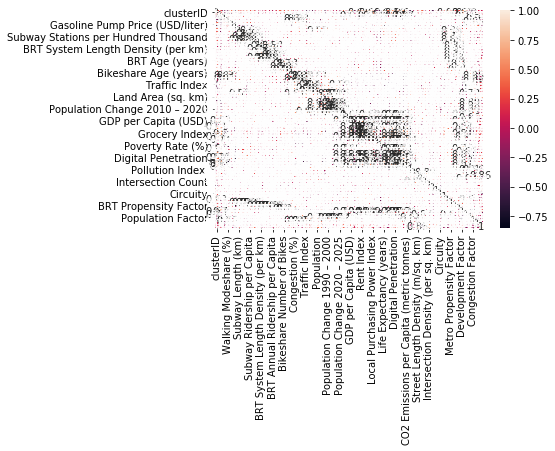

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
df = df.set_index('cityID') # Remove the indices and use cityID as index.

# Drop unnecessary columns (that explicitly imply each other)
# cityID implies City
# clusterID implies Typology
# Pollution Index is restricted to be used in prediction.
col2drop = ['City', 'Typology', 'Pollution Index ']
# col2drop = ['City', 'Typology']



df.drop(col2drop, inplace=True, axis=1) # Typology <=> clusterID, City <=> cityID, 
# df.drop("Pollution Index", axis=1)
# df.info()
# df["Pollution Index"]

In [5]:
df = df.replace(r'^\s*$', np.NaN, regex=True)
print("Initial dataframe shape [rows, columns]:", df.shape)
n_NaN = df.isna().sum().sum()
print(n_NaN) # As you can see the total number of NaNs in the database 3199, so we need to impute.

Initial dataframe shape [rows, columns]: (331, 74)
3040


In [6]:
df

clusterID                           Country  Car Modeshare (%)  \
cityID                                                                   
285             7                     United States            85.0000   
10              8                         Australia            80.0000   
186             1                             Niger                NaN   
328            12                           Vietnam             8.0000   
67             12                             China            21.7000   
297             7                     United States            88.6000   
90              9                            France            12.0000   
322             5                           Uruguay                NaN   
201             5                            Poland            27.0000   
209             2                            Russia                NaN   
120             3                             India            54.0000   
199             1                       Philippines                NaN   
29              1                       Ivory Coast                NaN   
301             7                     United States            86.8000   
32              1                          Cameroon                NaN   
113             3                             India            19.0000   
68             12                             China            42.0000   
258             7              United Arab Emirates            50.0000   
269             8                     United States            78.0000   
63             12                             China                NaN   
327            12                           Vietnam            11.0000   
256             6                           Ukraine                NaN   
185             1                         Nicaragua                NaN   
181             1                             Nepal                NaN   
14              3                        Bangladesh                NaN   
191             3                          Pakistan            48.0000   
264            10                    United Kingdom            68.0700   
5               1                            Angola                NaN   
20              2                           Bolivia                NaN   
93             10                            France            57.0000   
133             2                              Iraq                NaN   
177             1                           Morocco             9.0000   
47             11                             China            20.6000   
101            10                           Germany            43.0000   
2               1                           Algeria            12.8000   
117             3                             India            25.0000   
153             1                             Kenya             0.0000   
235            10                             Spain            30.0000   
233             7                       South Korea                NaN   
162             2                          Malaysia                NaN   
273             8                     United States            86.8000   
211             2                            Russia                NaN   
33              8                            Canada            64.5000   
89             10                           Finland            21.0000   
252             6                            Turkey                NaN   
268             8                     United States            84.7000   
135            10                           Ireland            64.0000   
173             4                            Mexico                NaN   
223             1                           Somalia                NaN   
210             2                            Russia                NaN   
195             4                              Peru            12.0000   
308             7                     United States            90.5000   
126         

In [100]:
#Make dataframe for transportation related variables only, leaving density variables because high correlation
#Find if there is a relationship between bikes, cars and public transport

In [135]:
dftransport = df[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)','Subway Length (km)','Subway Ridership per Capita','Subway Age (years)','BRT Length (km)','BRT Annual Ridership per Capita','BRT Age (years)','Bikeshare Stations','Bikeshare Number of Bikes','Bikeshare Age (years)','Congestion (%)']]


In [136]:
dftransport

Car Modeshare (%)  Public Transit Modeshare (%)  \
cityID                                                    
285             85.000000                      6.100000   
10              80.000000                     14.000000   
186              5.567976                      9.000000   
328              8.000000                     10.000000   
67              21.700000                     54.700000   
297             88.600000                      3.600000   
90              12.000000                     33.000000   
322              5.567976                      5.567976   
201             27.000000                     46.000000   
209              5.567976                      5.567976   
120             54.000000                     12.000000   
199              5.567976                      5.567976   
29               5.567976                      5.567976   
301             86.800000                      2.600000   
32               5.567976                      5.567976   
113             19.000000                     42.000000   
68              42.000000                     24.600000   
258             50.000000                      1.000000   
269             78.000000                     12.000000   
63               5.567976                     43.000000   
327             11.000000                      6.000000   
256              5.567976                      5.567976   
185              5.567976                      5.567976   
181              5.567976                      5.567976   
14               5.567976                      5.567976   
191             48.000000                     52.000000   
264             68.070000                     21.100000   
5                5.567976                      5.567976   
20               5.567976                      5.567976   
93              57.000000                     10.000000   
133              5.567976                      5.567976   
177              9.000000                     20.000000   
47              20.600000                     32.600000   
101             43.000000                     21.000000   
2               12.800000                     28.700000   
117             25.000000                     35.000000   
153              0.000000                     36.000000   
235             30.000000                     18.000000   
233              5.567976                      5.567976   
162              5.567976                      5.567976   
273             86.800000                      3.100000   
211              5.567976                      5.567976   
33              64.500000                     23.300000   
89              21.000000                     34.000000   
252              5.567976                      5.567976   
268             84.700000                      5.100000   
135             64.000000                     13.000000   
173              5.567976                     67.200000   
223              5.567976                      5.567976   
210              5.567976                      5.567976   
195             12.000000                     62.000000   
308             90.500000                      1.400000   
126              5.567976                      5.567976   
310             86.900000                      2.600000   
51              11.000000                     15.000000   
159              5.567976                      5.567976   
99              42.000000                     18.000000   
289             89.300000                      3.700000   
174             63.400000                     14.400000   
76               5.567976                      5.567976   
275             74.100000                     13.100000   
180              5.567976                      5.567976   
249             14.000000                     41.000000   
139             54.000000                     29.000000   
98              31.000000                     26.000000   
42              20.000000                     24.000000

In [103]:
from sklearn import decomposition

In [104]:
pca=decomposition.PCA()

In [105]:
pca.fit(dftransport)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
pca_new.explained_variance_ratio_

array([9.99464571e-01, 3.47206270e-04])

In [107]:
pca_new=decomposition.PCA(n_components=2)
pca_new.fit(dftransport)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
X_reduced=pca_new.transform(dftransport)

In [109]:
X_reduced.shape

(331, 2)

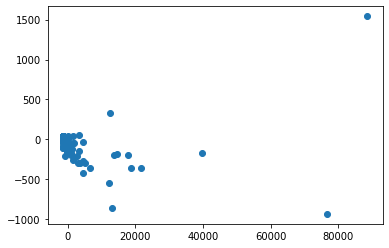

In [110]:
plt.scatter(X_reduced[:, 0], X_reduced[:,1]);

After applying 2 dimensional PCA we can see one big cluster with 11 outlier points. This cannot tells us much. By instepcting dataframe it seems, that car modeshare outweight the other variables. We can check this assumption by removing it from the dataframe and lets see what will happen.

In [111]:
#2D PCA with car modeshare removed

In [112]:
dftransport2 = df[['Car Modeshare (%)', 'Public Transit Modeshare (%)', 'Bicycle Modeshare (%)','Subway Length (km)','Subway Ridership per Capita','Subway Age (years)','BRT Length (km)','BRT Annual Ridership per Capita','BRT Age (years)','Bikeshare Stations','Bikeshare Number of Bikes','Congestion (%)']]


In [113]:
pca2=decomposition.PCA(n_components=2)
pca2.fit(dftransport2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [114]:
X_reduced2=pca2.transform(dftransport2)

In [115]:
X_reduced2.shape

(331, 2)

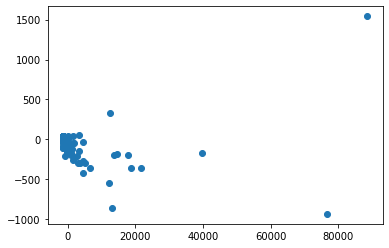

In [116]:
plt.scatter(X_reduced2[:, 0], X_reduced2[:,1]);

In [117]:
pca2.explained_variance_ratio_

array([9.99464769e-01, 3.47188762e-04])

The scatter plot did not change, however we got  slightly better explanation for x dimension and lower explanation for y dimension. The method did not tell us much so Lets try Muldidimensional scaling.

In [130]:
from sklearn.manifold import MDS

In [131]:
mds=MDS()

In [132]:
mds.fit(dftransport)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [133]:
mds.embedding_

array([[-1.70914814e+01, -1.36600399e+03],
       [-8.60531530e+00, -7.90012154e+02],
       [-9.90711410e+01, -1.40254168e+03],
       [-9.78444272e+01, -1.39731862e+03],
       [-1.62991934e+02, -1.39787564e+03],
       [-3.07458155e+01, -1.18972841e+03],
       [ 8.55519541e+02,  1.31392533e+04],
       [-1.02626654e+02, -1.40348252e+03],
       [-6.43055047e+01, -1.15639236e+03],
       [-1.27336516e+02, -1.37263403e+03],
       [-6.04649190e+01, -1.39548613e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-2.39909206e+01, -1.01363283e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-2.86805215e+02, -1.32468354e+03],
       [-7.53580679e+01, -1.38261115e+03],
       [-2.31841930e+01, -1.41818532e+03],
       [ 1.12170647e+03,  4.31790062e+03],
       [ 3.62496927e+01, -1.41828117e+03],
       [-9.48471889e+01, -1.40243638e+03],
       [-2.32542208e+02, -1.36246251e+03],
       [-9.81881672e+01, -1.40474584e+03],
       [-9.

In [134]:
plt.scatter(mds.embedding_[:,0], mds.embedding_[:,1])

Compared with previously done PCA, there are now 2 visible clusters  with 3 outlier points. The [0;0] centered cluster is the most densed. Although it does not have specific interpretation, based on the variables chosen for decomposition, we can guess that these points are cities with car share dominance as these type of city represents majority in the dataset. The next cluster located above at point [0;20000] can be cities with BRT and subway dominant modeshare. The outlier points can represent cities with significant usage of bicycle mode of transport.

In [97]:
# lets try PCA for number of componenets 3

In [98]:
pca_n3=decomposition.PCA(n_components=3)
pca_n3.fit(dftransport)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_reduced3=pca_n3.transform(dftransport)

In [21]:
X_reduced3.shape

(331, 3)

In [23]:
pca_n3.explained_variance_ratio_

array([9.99464769e-01, 3.47188762e-04, 1.16670492e-04])

By observig explained variance ratio it seems that adding another dimension did not provide significant improvement. However, the results are very affected by a large amounts of zero values. Lets try to form a different dataset with lower amount of selected variables zero values and do dimension reduction once more.

In [146]:
#Select density type variables
dftransport3=df[['Subway Length Density (per km)','BRT System Length Density (per km)','Network Density Factor','Population Density (per sq. km)','Street Length Density (m/sq. km)','Intersection Density (per sq. km)','Highway Proportion','Congestion Factor']]

In [147]:
pca_density=decomposition.PCA(n_components=2)
pca_density.fit(dftransport3)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [148]:
X_density=pca_density.transform(dftransport3)

In [149]:
X_density.shape

(331, 2)

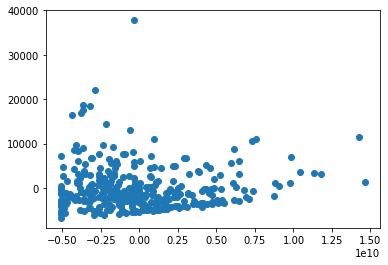

In [150]:
plt.scatter(X_density[:, 0], X_density[:,1]);

In [145]:
pca_density.explained_variance_ratio_

array([1.00000000e+00, 1.98668107e-12])

There is no vissible pattern on the figure. Lets try MDS

In [155]:
mds2=MDS()

In [156]:
mds2.fit(dftransport3)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [172]:
mds2.embedding_

array([[-1.18243824e+09,  2.21614749e+09],
       [-1.58787233e+09,  3.18513687e+09],
       [ 6.51935935e+08, -1.46093959e+09],
       [ 1.70983625e+09, -3.54922869e+09],
       [ 2.20518907e+09, -4.35098348e+09],
       [-2.04992658e+09,  4.23414456e+09],
       [-3.66627442e+09,  9.03962359e+09],
       [ 2.53856483e+08, -6.35019000e+08],
       [ 1.19729933e+08, -3.64738875e+08],
       [ 1.09369733e+09, -2.37718775e+09],
       [ 9.96650100e+07, -3.42241074e+08],
       [ 2.23681763e+09, -4.44211436e+09],
       [ 1.52432144e+09, -3.20667748e+09],
       [-1.66102614e+08,  1.87352774e+08],
       [ 1.35331855e+09, -2.84816184e+09],
       [-1.38233037e+09,  2.69103738e+09],
       [ 4.24687910e+08, -1.01138116e+09],
       [ 1.66665837e+09, -3.48251977e+09],
       [-1.54823830e+09,  3.11851413e+09],
       [ 1.37101923e+09, -2.89876852e+09],
       [ 1.45007002e+09, -3.07998928e+09],
       [ 3.26391036e+08, -8.12617068e+08],
       [ 1.19231037e+09, -2.58522103e+09],
       [-2.

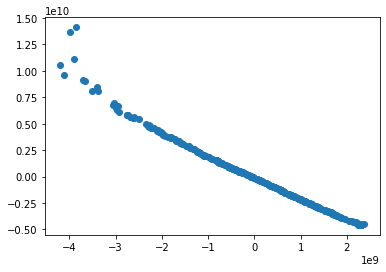

In [173]:
plt.scatter(mds2.embedding_[:,0], mds2.embedding_[:,1])

Now lets add some socioeconomic variables like ('Gasoline Pump Price (USD/liter)','GDP per Capita (USD)') and see what will happen

In [200]:
dftransport4=df[['Gasoline Pump Price (USD/liter)','GDP per Capita (USD)','Subway Length Density (per km)','BRT System Length Density (per km)','Network Density Factor','Population Density (per sq. km)','Street Length Density (m/sq. km)','Intersection Density (per sq. km)','Highway Proportion','Congestion Factor']]

In [201]:
mds3=MDS()

In [202]:
mds3.fit(dftransport4)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [203]:
mds3.embedding_

array([[ 8.79653243e+08, -2.34860246e+09],
       [ 1.22454040e+09, -3.33959695e+09],
       [-5.54286491e+08,  1.50106823e+09],
       [-1.40475363e+09,  3.68178823e+09],
       [-1.79022874e+09,  4.53994498e+09],
       [ 1.61719186e+09, -4.41612381e+09],
       [ 4.02999616e+09, -8.88063955e+09],
       [-2.53603384e+08,  6.34897236e+08],
       [-1.48718887e+08,  3.51998747e+08],
       [-9.16218162e+08,  2.45151552e+09],
       [-1.28685432e+08,  3.28459986e+08],
       [-1.80598009e+09,  4.63608416e+09],
       [-1.27150245e+09,  3.31581319e+09],
       [ 5.31611674e+07, -2.35888753e+08],
       [-1.09032673e+09,  2.96010387e+09],
       [ 1.08725961e+09, -2.82008952e+09],
       [-3.91793785e+08,  1.02419606e+09],
       [-1.37623465e+09,  3.60812581e+09],
       [ 1.21597639e+09, -3.26048913e+09],
       [-1.12241735e+09,  3.00475982e+09],
       [-1.22162829e+09,  3.17795263e+09],
       [-3.01376997e+08,  8.21261348e+08],
       [-1.00443736e+09,  2.66418176e+09],
       [ 2.

In [204]:
plt.scatter(mds3.embedding_[:,0], mds3.embedding_[:,1])

When applied MDS, Density related variables has created almost continuous decreasing line. That is very hardly interpretable, as we are looking more for clusters

It seems that applying dimension reduction methods on tranport related variables does not lead anywhere as no significant trends or patterns were observed.

# Congestion Prediction

Next thing we would like to try is to predict congestion - either by percentage congestion variable or congestion factor. We would like to find out if there is some relationship between congestions and weather, for example if the cities in hot climate are more likely to be congested. The plan is following - We will use dataset from https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities which contains temperature observation of major cities. Choose one day to get one temperature measurement, pair it with the cities dataset and then apply Gaussian mixture model. The missing observations for temperature will be either imputed or find in another dataset.

In [213]:
#we will nedd the city column again
dfcity = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 

In [214]:
dftemp =pd.read_csv('city_temperature.csv', index_col=0, skipinitialspace=True) # Read with excel index. 

C:\Users\vilem\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
dftemp.head(15)

Country State     City  Month  Day  Year  AvgTemperature
Region                                                          
Africa  Algeria   NaN  Algiers      1    1  1995            64.2
Africa  Algeria   NaN  Algiers      1    2  1995            49.4
Africa  Algeria   NaN  Algiers      1    3  1995            48.8
Africa  Algeria   NaN  Algiers      1    4  1995            46.4
Africa  Algeria   NaN  Algiers      1    5  1995            47.9
Africa  Algeria   NaN  Algiers      1    6  1995            48.7
Africa  Algeria   NaN  Algiers      1    7  1995            48.9
Africa  Algeria   NaN  Algiers      1    8  1995            49.1
Africa  Algeria   NaN  Algiers      1    9  1995            49.0
Africa  Algeria   NaN  Algiers      1   10  1995            51.9
Africa  Algeria   NaN  Algiers      1   11  1995            51.7
Africa  Algeria   NaN  Algiers      1   12  1995            51.3
Africa  Algeria   NaN  Algiers      1   13  1995            47.0
Africa  Algeria   NaN  Algiers      1   14  1995            46.9
Africa  Algeria   NaN  Algiers      1   15  1995            47.5

In [ ]:
#dropping unneccesary columns
col2drop = ['Country', 'State']

dftemp.drop(col2drop, inplace=True, axis=1) # Typology <=> clusterID, City <=> cityID, 

In [247]:
#Before merging with our dataset its neccessary to choose only one day
new_dftemp = dftemp.loc[(dftemp['Month'] == 9) & (dftemp['Day'] == 1) & (dftemp['Year'] == 2019)]

In [248]:
new_dftemp

City  Month  Day  Year  \
Region                                                                      
Africa                                          Algiers      9    1  2019   
Africa                                          Cotonou      9    1  2019   
Africa                                           Bangui      9    1  2019   
Africa                                      Brazzaville      9    1  2019   
Africa                                            Cairo      9    1  2019   
Africa                                      Addis Ababa      9    1  2019   
Africa                                       Libreville      9    1  2019   
Africa                                           Banjul      9    1  2019   
Africa                                          Conakry      9    1  2019   
Africa                                           Bissau      9    1  2019   
Africa                                          Abidjan      9    1  2019   
Africa                                          Nairobi      9    1  2019   
Africa                                            Rabat      9    1  2019   
Africa                                     Antananarivo      9    1  2019   
Africa                                           Maputo      9    1  2019   
Africa                                         Windhoek      9    1  2019   
Africa                                           Niamey      9    1  2019   
Africa                                            Lagos      9    1  2019   
Africa                                            Dakar      9    1  2019   
Africa                                         Capetown      9    1  2019   
Africa                                             Lome      9    1  2019   
Africa                                            Tunis      9    1  2019   
Africa                                    Dar Es Salaam      9    1  2019   
Africa                                          Kampala      9    1  2019   
Asia                                            Beijing      9    1  2019   
Asia                                            Chengdu      9    1  2019   
Asia                                          Guangzhou      9    1  2019   
Asia                                           Shanghai      9    1  2019   
Asia                                           Shenyang      9    1  2019   
Asia                                          Hong Kong      9    1  2019   
Asia                                    Bombay (Mumbai)      9    1  2019   
Asia                                           Calcutta      9    1  2019   
Asia                                   Chennai (Madras)      9    1  2019   
Asia                                              Delhi      9    1  2019   
Asia                                            Jakarta      9    1  2019   
Asia                                              Osaka      9    1  2019   
Asia                                            Sapporo      9    1  2019   
Asia                                              Tokyo      9    1  2019   
Asia                                             Almaty      9    1  2019   
Asia                                            Bishkek      9    1  2019   
Asia                                          Vientiane      9    1  2019   
Asia                                       Kuala Lumpur      9    1  2019   
Asia                                         Ulan-bator      9    1  2019   
Asia                                            Rangoon      9    1  2019   
Asia                                           Katmandu      9    1  2019   
Asia                                          Pyongyang      9    1  2019   
Asia                                          Islamabad      9    1  2019   
Asia                                            Karachi      9    1  2019   
Asia                                             Manila      9    1  2019   
Asia                                          Singapore      9    1  2019   
Asia                                           

KeyError: "['Country' 'State'] not found in axis"

In [249]:
df_new=pd.merge(dfcity, new_dftemp, on='City', how='outer')

In [250]:
df_new

City  cityID  clusterID                 Typology  \
0                 Baltimore(MD)   285.0        7.0              Auto Sprawl   
1                     Melbourne    10.0        8.0          Auto Innovative   
2                        Niamey   186.0        1.0       Congested Emerging   
3                         Hanoi   328.0       12.0       MetroBike Emerging   
4                        Urumqi    67.0       12.0       MetroBike Emerging   
5                 Milwaukee(WI)   297.0        7.0              Auto Sprawl   
6                         Paris    90.0        9.0  MassTransit Heavyweight   
7                    Montevideo   322.0        5.0          Hybrid Moderate   
8                        Krakow   201.0        5.0          Hybrid Moderate   
9                 Yekaterinburg   209.0        2.0        BusTransit Sprawl   
10                         Pune   120.0        3.0         Congested Boomer   
11                         Cebu   199.0        1.0       Congested Emerging   
12                      Abidjan    29.0        1.0       Congested Emerging   
13                   Austin(TX)   301.0        7.0              Auto Sprawl   
14                      Yaounde    32.0        1.0       Congested Emerging   
15                        Delhi   113.0        3.0         Congested Boomer   
16                        Hefei    68.0       12.0       MetroBike Emerging   
17                        Dubai   258.0        7.0              Auto Sprawl   
18                  Chicago(IL)   269.0        8.0          Auto Innovative   
19                       Dalian    63.0       12.0       MetroBike Emerging   
20             Ho Chi Minh City   327.0       12.0       MetroBike Emerging   
21                      Kharkiv   256.0        6.0             Hybrid Giant   
22                      Managua   185.0        1.0       Congested Emerging   
23                    Kathmandu   181.0        1.0       Congested Emerging   
24                   Chittagong    14.0        3.0         Congested Boomer   
25                      Karachi   191.0        3.0         Congested Boomer   
26                      Glasgow   264.0       10.0     MassTransit Moderate   
27                       Huambo     5.0        1.0       Congested Emerging   
28                   Santa Cruz    20.0        2.0        BusTransit Sprawl   
29                        Lille    93.0       10.0     MassTransit Moderate   
30                      Baghdad   133.0        2.0        BusTransit Sprawl   
31                        Rabat   177.0        1.0       Congested Emerging   
32                    Chongqing    47.0       11.0          MetroBike Giant   
33                 Cologne-Bonn   101.0       10.0     MassTransit Moderate   
34                      Algiers     2.0        1.0       Congested Emerging   
35                    Bangalore   117.0        3.0         Congested Boomer   
36                      Mombasa   153.0        1.0       Congested Emerging   
37                    Barcelona   235.0       10.0     MassTransit Moderate   
38                        Ulsan   233.0        7.0              Auto Sprawl   
39                  Johor Bahru   162.0        2.0        BusTransit Sprawl   
40                  Atlanta(GA)   273.0        8.0          Auto Innovative   
41                       Samara   211.0        2.0        BusTransit Sprawl   
42                      Toronto    33.0        8.0          Auto Innovative   
43                     Helsinki    89.0       10.0     MassTransit Moderate   
44                        Bursa   252.0        6.0             Hybrid Giant   
45              Los Angeles(CA)   268.0        8.0          Auto Innovative   
46                       Dublin   135.0       10.0     MassTransit Moderate   
47                     Acapulco   173.0        4.0         BusTransit Dense   
48                    Mogadishu   223.0        1.0       Congested Emerging   
49              Nizhny Novgorod   210.0        2.0        BusTransit Sprawl  